<a href="https://colab.research.google.com/github/Engmohamed2021/Change-Team-/blob/main/SF_Salaries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read the data**

In [ ]:
df = pd.read_csv('/content/Salaries.csv', low_memory=False)

# **Explore the Data**

In [ ]:
df.head(5)

In [ ]:
df.info()

**1. Columns names**

In [ ]:
df.columns

**2. Checking null values**

In [ ]:
df.isna().sum()

In [ ]:
df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]] = df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.head(5)

**3. Drop NaN column**

In [ ]:
if 'Notes' in df.columns:
    df = df.drop('Notes', axis=1)

In [ ]:
df.isna().sum()

In [ ]:
df[df['BasePay'].isnull()]

**4. Fill in NaN values with the average**

In [ ]:
df['BasePay'] = df['BasePay'].fillna(df['BasePay'].mean())

In [ ]:
df[df['BasePay'].isnull()]

In [ ]:
df['Benefits'].isnull().sum()

In [ ]:
df[df['Status'].isnull()]

**5. Row with maximum overtime**

In [ ]:
row_with_max_overtime = df.loc[df['OvertimePay'].idxmax()]
display(row_with_max_overtime)

**6. Showing the JobTite of "JOSEPH DRISCOLL"**

In [ ]:
df.loc[df['EmployeeName'] == 'JOSEPH DRISCOLL']

In [ ]:
df.loc[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

In [ ]:
df.head(5)

In [ ]:
df.loc[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

**7. Row with maximum Total Pay**

In [ ]:
df.loc[df['TotalPayBenefits'].idxmax()]

In [ ]:
df.loc[df['TotalPayBenefits'].idxmax()]['EmployeeName']

**8. Row with minimum Total Pay**

In [ ]:
df.loc[df['TotalPayBenefits'].idxmin()]

In [ ]:
df.loc[df['TotalPayBenefits'].idxmin()]['EmployeeName']

In [ ]:
df['OtherPay'].replace('Not Provided',0.0)

In [ ]:
df.loc[df['OtherPay'].idxmin()]

In [ ]:
df['Year']

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [ ]:
df.groupby('Year')['BasePay'].mean()

In [ ]:
df['JobTitle'].unique()

In [ ]:
df['JobTitle'].nunique()

In [ ]:
df.head(5)

In [ ]:
df.groupby('JobTitle')['TotalPayBenefits'].max().sort_values(ascending=False)

In [ ]:
df.groupby('JobTitle')['TotalPayBenefits'].min()

In [ ]:
df['JobTitle'].value_counts().head()

In [ ]:
df.groupby('JobTitle')['Year'].value_counts().sort_values()

In [ ]:
(df[df['Year'] == '2013-01-01']['JobTitle'].value_counts() ==1).sum()

In [ ]:
(df[df['JobTitle'].str.contains('Chief', case=False)]['EmployeeName'].value_counts()).sum()

np.int64(627)

In [ ]:
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


In [ ]:
df.info()

# **Visualization**

<Axes: xlabel='Year', ylabel='BasePay'>

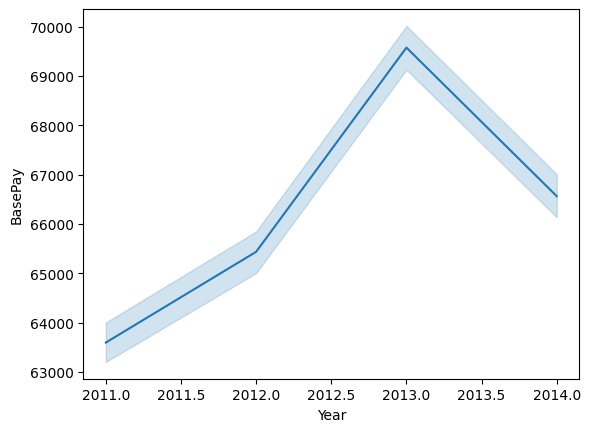

In [ ]:
sns.lineplot(x='Year', y='BasePay', data=df)

In [ ]:
df.head(5)

<Axes: xlabel='Year', ylabel='TotalPayBenefits'>

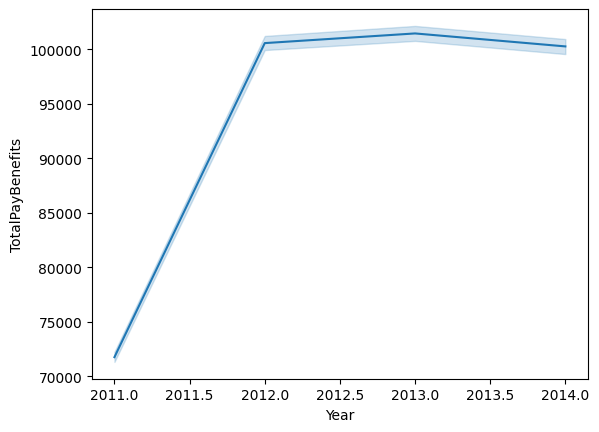

In [ ]:
sns.lineplot(x='Year', y='TotalPayBenefits', data=df)

### Distribution of Total Pay Benefits

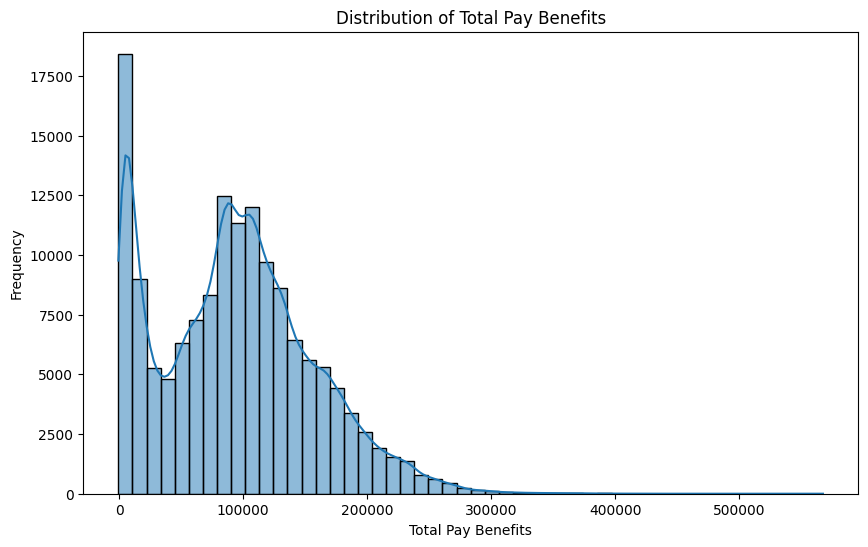

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPayBenefits'], bins=50, kde=True)
plt.title('Distribution of Total Pay Benefits')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Frequency')
plt.show()

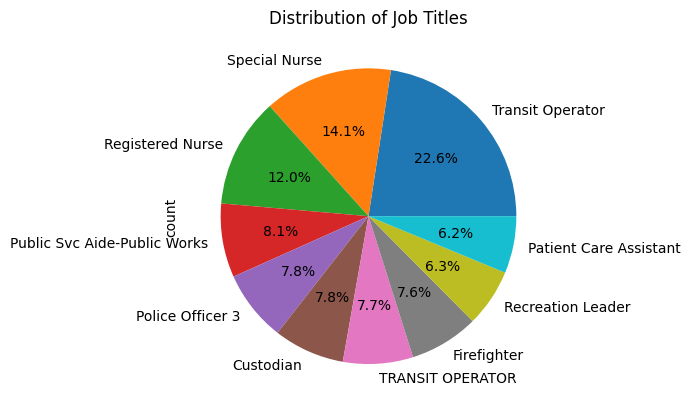

In [ ]:
ddf = df['JobTitle'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Job Titles')
plt.show()